In [1]:
import numpy as np
import bokeh
import pynbody

import simulation
import matplotlib.pyplot as plt
import ipywidgets

In [2]:
SIM_PATH = '/home/michele/sim/MySimulations/hi_osc/mb.69002_p200_a800_r600/out'

In [3]:
sim = simulation.Simulation(SIM_PATH)

loading simulation: /home/michele/sim/MySimulations/hi_osc/mb.69002_p200_a800_r600/out
Found parameter file
Found compiler file
Found 563 snapshots
Loading cosmological parameters
Found trace file


In [45]:
s = sim[1]
s.physical_units()
s.g['rho'].units, s.g['temp'].units

(Unit("Msol kpc**-3"), Unit("K"))

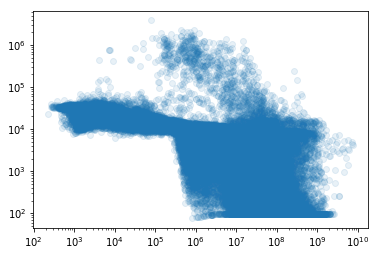

In [53]:
plt.scatter(s.g['rho'], s.g['temp'], alpha=.1)
plt.xscale('log')
plt.yscale('log')
# plt.ylim(1, 1e6)
# plt.xlim(1, 1e8)

In [68]:
s.g['rho'].in_units('g cm**-3').max()

SimArray(5.0496726e-22, dtype=float32, 'g cm**-3')

In [73]:
import ipywidgets
def k(i=(0, len(sim)-1)):
    s = sim[i]
    s.physical_units()
#     s.g['rho'].units, s.g['temp'].units
    plt.scatter(s.g['rho'].in_units('g cm**-3'), s.g['temp'], alpha=.1)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(r'$\rho$ [g/cm$^3$]')
    plt.ylabel(r'T [K]')
    plt.xlim(1e-31, 1e-20)
#     plt.ylim(30, 1e7)

ipywidgets.interactive(k)

interactive(children=(IntSlider(value=281, description='i', max=562), Output()), _dom_classes=('widget-interac…

In [6]:
from bokeh.io import output_notebook
from bokeh.models import CustomJS, Slider, ColumnDataSource
from bokeh.layouts import layout, row, column
from bokeh.plotting import figure, show, save, output_notebook, output_file
output_notebook()

Loading BokehJS ...

In [26]:
# cb = CustomJS(args=dict(im=im, source=source), code="""
#     span.location = source.data['time'][cb_obj.value];
#     im.data_source.data['url'] = [source.data['maps'][cb_obj.value]];
#     im.data_source.change.emit();
# """)


NameError: name 'vline' is not defined

In [7]:
p = figure()

In [8]:
source = ColumnDataSource(dict(rho=s.g['rho'], temp=s.g['temp']))

In [9]:
# source = ColumnDataSource(dict(s))

In [10]:
# d = dict()
# for k in s.g.all_keys():
#     try:
#         d[k] = s.g[k]
#     except KeyError:
#         pass
# all_source = ColumnDataSource(d)

In [22]:
len(s.g['rho'])

130311

In [19]:
c = p.circle(source.data['rho'], source.data['temp'], alpha=0.2)

In [49]:
slider = Slider(start=0, end=len(sim)-1, value=0, step=1, title="image number")

l = layout([p, slider])
# show(l)